In [2]:
# Natural Language Processing

In [1]:

# =============================================================================
# Natural Language Processing Code
# =============================================================================


In [3]:
# =============================================================================
# Importing the librarie
# =============================================================================

In [16]:
!pip install wordcloud

In [1]:
import os # working directory
import matplotlib.pyplot as plt #  plots
import pandas as pd # data handling
import re # regex --> pattern matching
import nltk # NLP Library
from nltk.corpus import stopwords # importing stopwords to remove
from nltk.stem.porter import PorterStemmer # stemming
from nltk.stem import WordNetLemmatizer # Lemmitization
import string # regex
from wordcloud import WordCloud # Generating word clouds
from nltk.sentiment.vader import SentimentIntensityAnalyzer  # Sentiment Analysis
nltk.download('stopwords') # Downwloding the stopwords
nltk.download('wordnet') # Downwloding the word 
nltk.download('omw-1.4') # Downwloding the omw


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dipan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dipan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dipan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# =============================================================================
# User Inputs
# =============================================================================

In [3]:
# Importing the dataset
#os.chdir(R'C:\G_Ivy\01_Python\Natural Language Processing')
#os.getcwd()
dataset = pd.read_csv('./data/Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)
dataset.head(10)


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [3]:
dataset.shape

(1000, 2)

In [20]:
# =============================================================================
# 1st Block: Analysis of Restaruant Review
# =============================================================================

In [4]:
# find The number of possitive and Nergative review data 
print("The number of Positive reviews=", (dataset["Liked"]==1).sum())
print("The number of Negative reviews=", (dataset["Liked"]==0).sum())

The number of Positive reviews= 500
The number of Negative reviews= 500


In [5]:
#Defining empty text of Postitve Reviews and Negative Reviews
pos_rev=" "
neg_rev=" "

In [6]:
#1. Creation of Positive & Negative Review Text

"""Appending all the Postive Review and Negative Reviews Seperately"""

for i in range(0,dataset.shape[0]):
    if dataset["Liked"][i]==1:
        pos_rev=pos_rev+" "+dataset["Review"][i] # appending +ve reviews
    if dataset["Liked"][i]==0:
        neg_rev=neg_rev+" "+dataset["Review"][i] # appending -ve reviews

#pos_rev # chake the positive reviews. but huge data is presents ignored that concepts
#neg_rev # chack negative reviews 

In [7]:
pos_rev

'  Wow... Loved this place. Stopped by during the late May bank holiday off Rick Steve recommendation and loved it. The selection on the menu was great and so were the prices. The fries were great too. A great touch. Service was very prompt. I tried the Cape Cod ravoli, chicken, with cranberry...mmmm! Highly recommended. The food, amazing. Service is also cute. I could care less... The interior is just beautiful. So they performed. That\'s right....the red velvet cake.....ohhh this stuff is so good. This hole in the wall has great Mexican street tacos, and friendly staff. Also there are combos like a burger, fries, and beer for 23 which is a decent deal. I found this place by accident and I could not be happier. Overall, I like this place a lot. The only redeeming quality of the restaurant was that it was very inexpensive. Ample portions and good prices. My first visit to Hiro was a delight! The shrimp tender and moist. On a positive note, our server was very attentive and provided gre

In [8]:
neg_rev

'  Crust is not good. Not tasty and the texture was just nasty. Now I am getting angry and I want my damn pho. Honeslty it didn\'t taste THAT fresh.) The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer. Would not go back. The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced. I was disgusted because I was pretty sure that was human hair. I was shocked because no signs indicate cash only. Waitress was a little slow in service. This place is not worth your time, let alone Vegas. did not like at all. The Burrittos Blah! - They never brought a salad we asked for. Took an hour to get our food only 4 tables in restaurant my food was Luke warm, Our sever was running around like he was totally overwhelmed. The worst was the salmon sashimi. This was like the final blow! seems like a good quick place to grab a bite of some familiar pub food, but do yourself a favor and look elsewhere. Poor ser

In [9]:
# creats length of positive reviews
print("Length of positive reviews-",len(pos_rev))
print("")
print("Part of positive reviews-")
print(pos_rev[1000:2000])

Length of positive reviews- 28441

Part of positive reviews-
 service. The only thing I did like was the prime rib and dessert section. The burger is good beef, cooked just right. If you want a sandwich just go to any Firehouse!!!!! My side Greek salad with the Greek dressing was so tasty, and the pita and hummus was very refreshing. We ordered the duck rare and it was pink and tender on the inside with a nice char on the outside. He came running after us when he realized my husband had left his sunglasses on the table. Their chow mein is so good! The portion was huge! Loved it...friendly servers, great food, wonderful and imaginative menu. The salad had just the right amount of sauce to not over power the scallop, which was perfectly cooked. This place receives stars for their APPETIZERS!!! The cocktails are all handmade and delicious. We'd definitely go back here again. We are so glad we found this place. Great food and service, huge portions and they give a military discount. Always

In [10]:
# creats length of positive reviews
print("Length of negative reviews-",len(neg_rev))
print("")
print("Part of negative reviews-")
print(neg_rev[1:200]) # We see some reviews as per 

Length of negative reviews- 30876

Part of negative reviews-
 Crust is not good. Not tasty and the texture was just nasty. Now I am getting angry and I want my damn pho. Honeslty it didn't taste THAT fresh.) The potatoes were like rubber and you could tell the


In [11]:
#2. Cleaning of Text by removing the Punctuation Marks
""" removal of punctuations """
string.punctuation

#Creating empty with Punctuation removal(punctuation means-comma ,excematary,fullstop, other things)
text_nopunct_pos=''   #initating the variable with an empty string
text_nopunct_pos= "".join([char for char in pos_rev if char not in string.punctuation])
text_nopunct_pos

'  Wow Loved this place Stopped by during the late May bank holiday off Rick Steve recommendation and loved it The selection on the menu was great and so were the prices The fries were great too A great touch Service was very prompt I tried the Cape Cod ravoli chicken with cranberrymmmm Highly recommended The food amazing Service is also cute I could care less The interior is just beautiful So they performed Thats rightthe red velvet cakeohhh this stuff is so good This hole in the wall has great Mexican street tacos and friendly staff Also there are combos like a burger fries and beer for 23 which is a decent deal I found this place by accident and I could not be happier Overall I like this place a lot The only redeeming quality of the restaurant was that it was very inexpensive Ample portions and good prices My first visit to Hiro was a delight The shrimp tender and moist On a positive note our server was very attentive and provided great service The only thing I did like was the prim

In [12]:
#3. Creating the Tokens from the Aggregated String
""" Creating Tokens from the Text """

#Initating the tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

#Tokenizing the text
pos_tokens = tokenizer.tokenize(text_nopunct_pos) # all the token number counts
len(pos_tokens)


5118

In [13]:
#4. Normalizing the Text by converting them into lowercase
""" Lowercase conversion """

#now we shall make everything lowercase for uniformity
#to hold the new lower case words

words_pos = [] #Initating empty list 

# Looping through the tokens and make them lower case
for word in pos_tokens:
    words_pos.append(word.lower())

    

In [17]:
#print(words_pos)

In [18]:
#5. Removing the Stopwords from the Tokens
""" Stopword Removals """

#Stop words are generally the most common words in a language.
#English stop words from nltk.    
final_words_pos=[]#Empty List for appending without stopwords

#Now we need to remove the stop words from the words variable
#Appending to words_new all words that are in words but not in sw
stop_words = set(stopwords.words("english"))

for word in words_pos:
    if word not in stop_words:
        final_words_pos.append(word)   
        
print("Final List of Postive Tokens is complete!")

Final List of Postive Tokens is complete!


In [19]:
len(stop_words)

179

In [32]:
#6. Extracting the Lemmatized words
""" Lemmatization """
    
wn = WordNetLemmatizer() #Initating Lemmatization token, returns the root/base words which returns meaningful words
lem_words_pos=[]#Empty List to contain lematized words

for word in final_words_pos:
    word=wn.lemmatize(word)#Lemmitization
    lem_words_pos.append(word)
  

In [25]:
#print(lem_words_pos)

In [26]:
#7. Extracting the Stemmed words(generally lemmatization is used we can ignore the Stemming )
""" Stemming """
    
ps = PorterStemmer() #Initating Stemming token, returns the root/base words 

stem_words_pos=[]#Empty List to contain lematized words

for word in final_words_pos:
    word=ps.stem(word)# Stemming
    stem_words_pos.append(word)

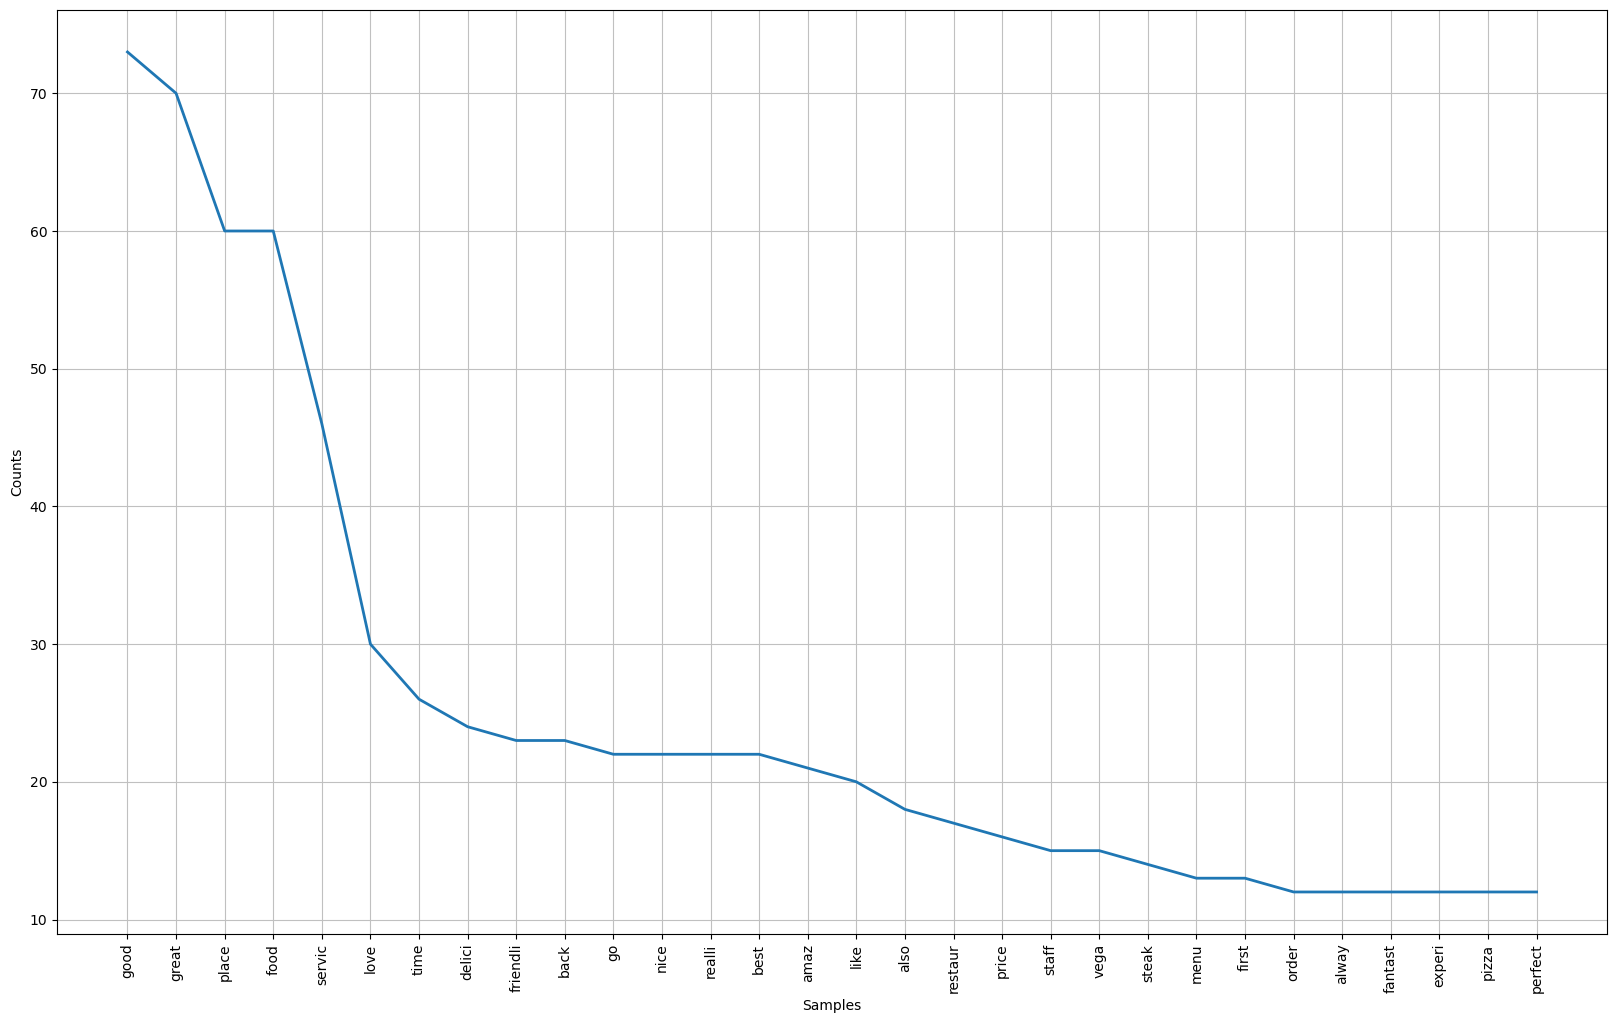

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [31]:
#8. Create the Frequency Distribution of the Lemmatized Words
""" Frequency Distribution of Postive/Negative Tokens """
      
#The frequency distribution of the words
freq_dist_pos = nltk.FreqDist(lem_words_pos)
freq_dist_pos_stem = nltk.FreqDist(stem_words_pos)


#Frequency Distribution Plot
plt.subplots(figsize=(20,12))
#freq_dist_pos.plot(30)
freq_dist_pos_stem.plot(30)

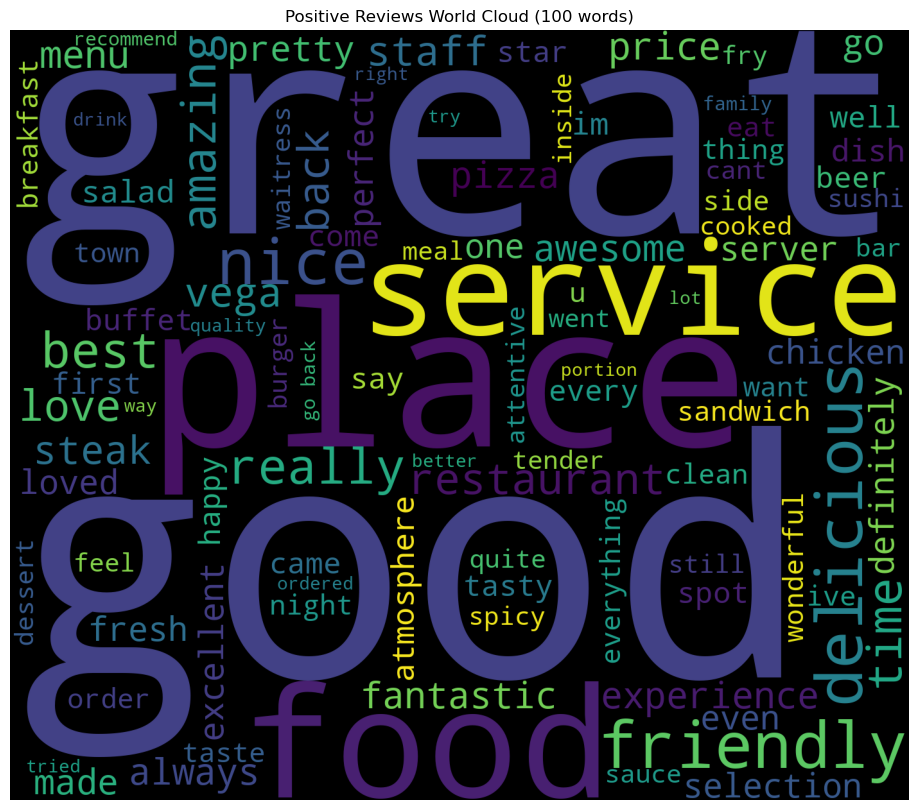

In [33]:
#9. Create the Word Clouds based on tokens
""" Creating Word Clouds """

#converting into string
res_pos=' '.join([i for i in lem_words_pos if not i.isdigit()])

plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res_pos)


plt.imshow(wordcloud)
plt.title('Positive Reviews World Cloud (100 words)')
plt.axis('off')
plt.show()


In [18]:
# =============================================================================
# Same Insights Excercise --> Negative Reviews
# =============================================================================


In [48]:
#2. Cleaning of Text by removing the Punctuation Marks
""" removal of punctuations """
string.punctuation

#Creating empty with Punctuation removal(punctuation means-comma ,excematary,fullstop, other things)
text_nopunct_neg=''   #initating the variable with an empty string
text_nopunct_neg= "".join([char for char in neg_rev if char not in string.punctuation])


In [50]:
#3. Creating the Tokens from the Aggregated String
""" Creating Tokens from the Text """

#Initating the tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

#Tokenizing the text
neg_tokens = tokenizer.tokenize(text_nopunct_neg) # all the token number counts
len(neg_tokens)

5729

In [53]:
#4. Normalizing the Text by converting them into lowercase
""" Lowercase conversion """

#now we shall make everything lowercase for uniformity
#to hold the new lower case words

words_neg = [] #Initating empty list 

# Looping through the tokens and make them lower case
for word in neg_tokens:
    words_neg.append(word.lower())

    

In [54]:
#5. Removing the Stopwords from the Tokens
""" Stopword Removals """

#Stop words are generally the most common words in a language.
#English stop words from nltk.    
final_words_neg=[]#Empty List for appending without stopwords

#Now we need to remove the stop words from the words variable
#Appending to words_new all words that are in words but not in sw
stop_words = set(stopwords.words("english"))

for word in words_neg:
    if word not in stop_words:
        final_words_neg.append(word)   
        
print("Final List of Negative Tokens is complete!")

Final List of Negative Tokens is complete!


In [55]:
len(stop_words)

179

In [56]:
#6. Extracting the Lemmatized words
""" Lemmatization """
    
wn = WordNetLemmatizer() #Initating Lemmatization token, returns the root/base words which returns meaningful words
lem_words_neg=[]#Empty List to contain lematized words

for word in final_words_neg:
    word=wn.lemmatize(word)#Lemmitization
    lem_words_neg.append(word)
  

In [57]:
#7. Extracting the Stemmed words(generally lemmatization is used we can ignore the Stemming )
""" Stemming """
    
ps = PorterStemmer() #Initating Stemming token, returns the root/base words 

stem_words_neg=[]#Empty List to contain lematized words

for word in final_words_neg:
    word=ps.stem(word)# Stemming
    stem_words_neg.append(word)

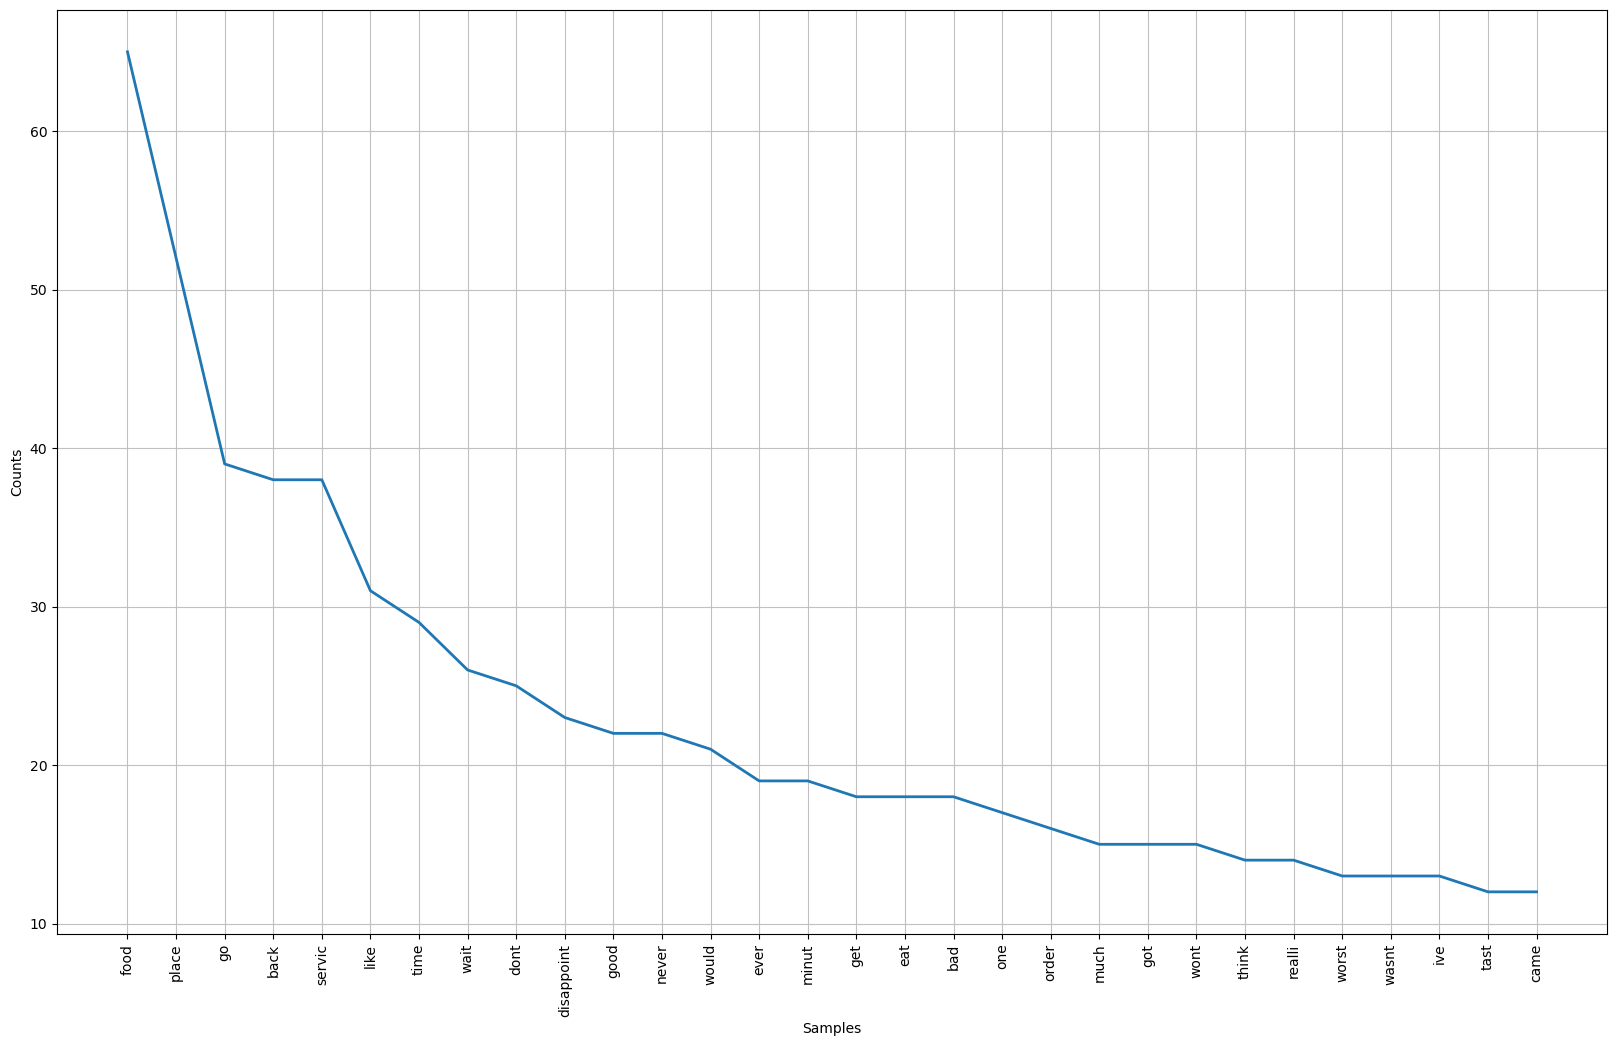

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [58]:
#8. Create the Frequency Distribution of the Lemmatized Words
""" Frequency Distribution of Postive/Negative Tokens """
      
#The frequency distribution of the words
freq_dist_neg = nltk.FreqDist(lem_words_neg)
freq_dist_neg_stem = nltk.FreqDist(stem_words_neg)


#Frequency Distribution Plot
plt.subplots(figsize=(20,12))
#freq_dist_pos.plot(30)
freq_dist_neg_stem.plot(30)

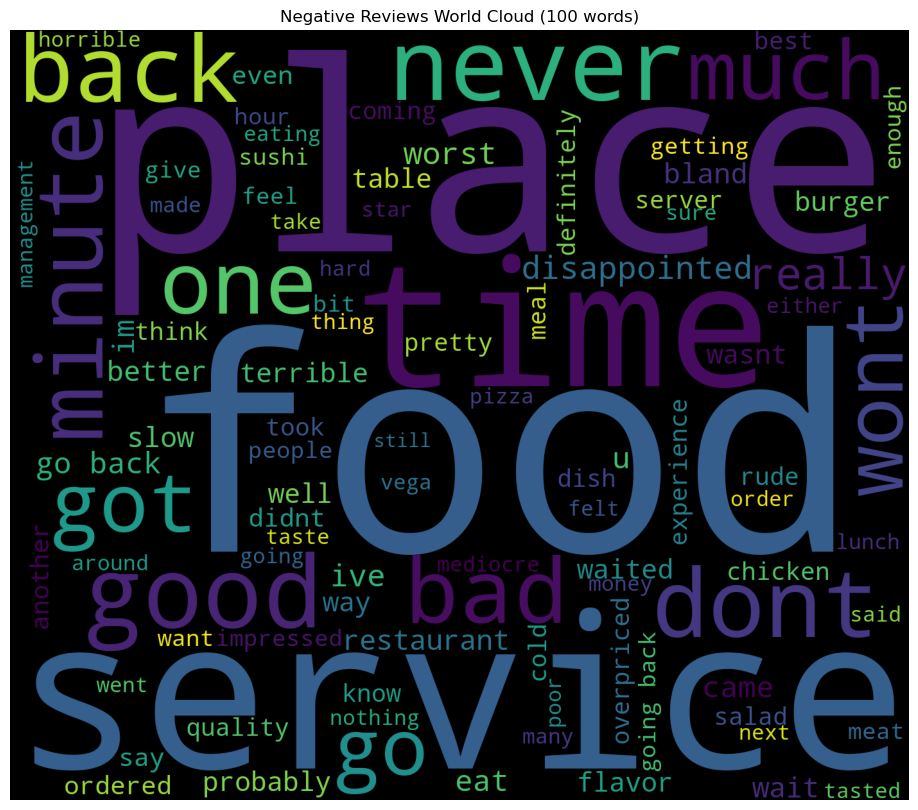

In [59]:
#9. Create the Word Clouds based on tokens
""" Creating Word Clouds """

#converting into string
res_neg=' '.join([i for i in lem_words_neg if not i.isdigit()])

plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res_neg)


plt.imshow(wordcloud)
plt.title('Negative Reviews World Cloud (100 words)')
plt.axis('off')
plt.show()


In [19]:
# =============================================================================
# 2nd Block: Modeling on the Reviews
# =============================================================================

In [60]:

corpus = [] #Definining the corpus matrix

for i in range(0, dataset.shape[0]):
    # column : "Review", row ith 
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    
    # convert all cases to lower cases 
    review = review.lower()
        
    # split to array(default delimiter is " ") 
    review = review.split()
    
    # creating PorterStemmer object to take main stem of each word 
    #ps = PorterStemmer()
    
    # loop for stemming each word in string array at ith row 
    #review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    
    #Applying Lemmatization
    lemmatizer = WordNetLemmatizer()
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stop_words)]
    
    
    # rejoin all string array elements to create back into a string 
    review = ' '.join(review)
    corpus.append(review)


In [ ]:
# =============================================================================
# Creating the Bag of Words model 
# =============================================================================

In [61]:

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2000)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values # output requred

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import classification_report 
print(classification_report(y_pred, 
            y_test))

              precision    recall  f1-score   support

           0       0.49      0.79      0.61        61
           1       0.87      0.65      0.74       139

    accuracy                           0.69       200
   macro avg       0.68      0.72      0.68       200
weighted avg       0.76      0.69      0.70       200



In [ ]:

# =============================================================================
# Trying other predictive models
# =============================================================================

In [62]:
# in is model we can used the dission tree models of random forest
# Fitting Decision Trees to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

classifier_DT.fit(X_train, y_train)


# Predicting the Test set results
y_pred_DT = classifier_DT.predict(X_test)

cm_DT = confusion_matrix(y_test, y_pred_DT)
print(classification_report(y_pred_DT, 
            y_test))


# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators=1000, criterion = 'entropy',random_state = 0)

classifier_rf.fit(X_train, y_train)


# Predicting the Test set results
y_pred_rf = classifier_rf.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf)
print(classification_report(y_pred_rf, 
            y_test))


              precision    recall  f1-score   support

           0       0.76      0.64      0.69       116
           1       0.59      0.73      0.65        84

    accuracy                           0.68       200
   macro avg       0.68      0.68      0.67       200
weighted avg       0.69      0.68      0.68       200

              precision    recall  f1-score   support

           0       0.88      0.63      0.73       135
           1       0.51      0.82      0.63        65

    accuracy                           0.69       200
   macro avg       0.70      0.72      0.68       200
weighted avg       0.76      0.69      0.70       200



In [ ]:
# Fitting Random Forest Classification to the Training set
#from sklearn.ensemble import RandomForestClassifier
#classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)



In [ ]:
# using tf-idf calculations

In [63]:
# tf-idf calculations
X = dataset.iloc[:,0].values
y = dataset.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

from sklearn.feature_extraction.text import TfidfTransformer
#create pipeline
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [65]:
pipeline.fit(X_train, y_train)

#using pipeline to predict
predictions = pipeline.predict(X_test)

#printing confusion matrix and classification report
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))




[[110  40]
 [ 37 113]]


              precision    recall  f1-score   support

           0       0.75      0.73      0.74       150
           1       0.74      0.75      0.75       150

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



In [55]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [56]:
#using pipeline to predict
predictions = pipeline.predict(X_test)

In [57]:
#printing confusion matrix and classification report(improved the accuracy)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))


[[117  33]
 [ 36 114]]


              precision    recall  f1-score   support

           0       0.76      0.78      0.77       150
           1       0.78      0.76      0.77       150

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300

